In [2]:
!pip install fuzzy-c-means

   ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/46.0 kB ? eta -:--:--
   -------- ------------------------------- 10.2/46.0 kB ? eta -:--:--
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 46.0/46.0 kB 95.3 kB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabul

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("respiratory_clean.csv")
df = data.copy()

In [6]:
df.head(2)

,sex,age,duration,cough,night_fever,catarrh,cold,tenderness,headache,black_stool,...,vaginal_discharge,vaginal_itching,stooling,running_nose,club_pain,bleeding_from_the_nose,unable_to_speak,mouth_breathing,sleep_apneas,symptoms
0,M,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,MALARIA
1,M,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,URTI


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   sex                                 305 non-null    object
 1   age                                 305 non-null    int64 
 2   duration                            305 non-null    int64 
 3   cough                               305 non-null    int64 
 4   night_fever                         305 non-null    int64 
 5   catarrh                             305 non-null    int64 
 6   cold                                305 non-null    int64 
 7   tenderness                          305 non-null    int64 
 8   headache                            305 non-null    int64 
 9   black_stool                         305 non-null    int64 
 10  jerking_movement_of_the_hands       305 non-null    int64 
 11  unable_to_sit_unsupported           305 non-null    int64 

In [8]:
df.shape

(305, 63)

In [21]:
unique_disease = df['symptoms'].unique()
print("Unique values in 'symptoms' column:", unique_disease)

Unique values in 'symptoms' column: ['MALARIA' 'URTI' 'HEAMORRHAGIC DISEASE' 'PERINATAL  ASPHYXIA'
 'FERNATAL ASPYHXIA' 'NNS' 'MACROSOMU BABY' 'RVD-RETRO VIRUS DISEASE'
 'GET SEPSIS' 'SEVERE MALARIA' 'HYPERPYREXIA' 'ACUTE URTI' 'PNEUMONIA'
 'BPN' 'DIARRHEA' 'DEHYDRATION' 'ASTHMA' 'POORLY TREATED MALARIA'
 'ACUTE ASTHMA' 'CARDIAC CASE' 'UNTREATED MALARIA' 'INGUINAL HERNIA'
 'ECZEMA' 'FUMCULOSIS' 'UNCOMPLICATED MALARIA'
 'PELVIC INFLAMMATORY DISEASE' 'HYPERTENSIVE HEART DISEASE' 'SEPSIS'
 'COUGH' 'HEUGRAGHIC TONGUE' 'ORAL THRUSH' 'AIRWAY OBSTRUCTION'
 'HYPERTENSION' 'MALARIA WITH PEPSIS' 'BRONCHOPNEUMONIA' 'MALARIAL'
 'E-FEVER' 'PEPTIC ULCER D2' 'CHRONIC KIDNEY DISEASE (CKD)'
 'RIGHT VENTRICULAR DYSPLASIA (RVD)' 'SALMONELLOSIS' 'UTI'
 'PYELONEPHRITIS' 'TONSILLITIS' 'SEVERE ANEMIA' 'HYDROCELL' 'PID'
 'PHERYGITIS' 'DELAYED SPEECH' 'OBSTRUCTIVE ADENOID' 'OBSTRUCTIVE AXIS']


In [19]:
# Inspect the gender column
print("Unique values in 'gender' column:", data['sex'].unique())

Unique values in 'gender' column: ['M' 'F']


In [22]:
# Encode 'sex' column if present (e.g., M -> 1, F -> 0)
if 'sex' in data.columns:
    df['sex'] = df['sex'].map({'M': 1, 'F': 0})

In [23]:
df.head(2)

,sex,age,duration,cough,night_fever,catarrh,cold,tenderness,headache,black_stool,...,vaginal_discharge,vaginal_itching,stooling,running_nose,club_pain,bleeding_from_the_nose,unable_to_speak,mouth_breathing,sleep_apneas,symptoms
0,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,MALARIA
1,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,URTI


In [25]:
df.columns

Index(['sex', 'age', 'duration', 'cough', 'night_fever', 'catarrh', 'cold',
       'tenderness', 'headache', 'black_stool',
       'jerking_movement_of_the_hands', 'unable_to_sit_unsupported',
       'throat_fever', 'fast_breathing', 'body_rashes', 'cough_sills',
       'frequent_stooling', 'chest_pain', 'frequent_vomiting',
       'sleep_disturbance_at_night', 'nasal_stuffiness', 'excessive_sweating',
       'chronic_cough', 'profuse_nasal_discharge', 'difficulty_in_breathing',
       'itching_ear', 'frequent_urination',
       'swelling_of_pubic_area_right_sided', 'generalized_body_rashes',
       'painful_swallowing', 'passage_of_freight', 'poor_vision',
       'frequent_micturition', 'watery_of_the_tongue', 'poor_appetite',
       'noisy_breathing', 'pepsis_swells_up_since_birth', 'body_weakness',
       'flame_pain', 'swollen_leg', 'abdominal_pain', 'excessive_salivation',
       'crawling_sensation', 'weight_loss', 'g.b_pain', 'stomach_ache',
       'tysing_of_the_right_ear', 're

In [26]:
df['symptoms'].nunique()

51

In [27]:
df['symptoms'].value_counts()

symptoms
URTI                                 135
MALARIA                               61
UNCOMPLICATED MALARIA                  9
PNEUMONIA                              6
SEVERE MALARIA                         6
ACUTE URTI                             4
SEPSIS                                 4
UNTREATED MALARIA                      4
DIARRHEA                               4
UTI                                    3
PELVIC INFLAMMATORY DISEASE            3
HYPERPYREXIA                           2
HYPERTENSIVE HEART DISEASE             2
OBSTRUCTIVE ADENOID                    2
DELAYED SPEECH                         2
PHERYGITIS                             2
PID                                    2
TONSILLITIS                            2
MALARIA WITH PEPSIS                    2
HYPERTENSION                           2
GET SEPSIS                             2
ORAL THRUSH                            2
HEUGRAGHIC TONGUE                      2
COUGH                                  2
AIRWAY 

In [31]:
df_corr = df.drop(columns='symptoms', axis=1)

<Axes: >

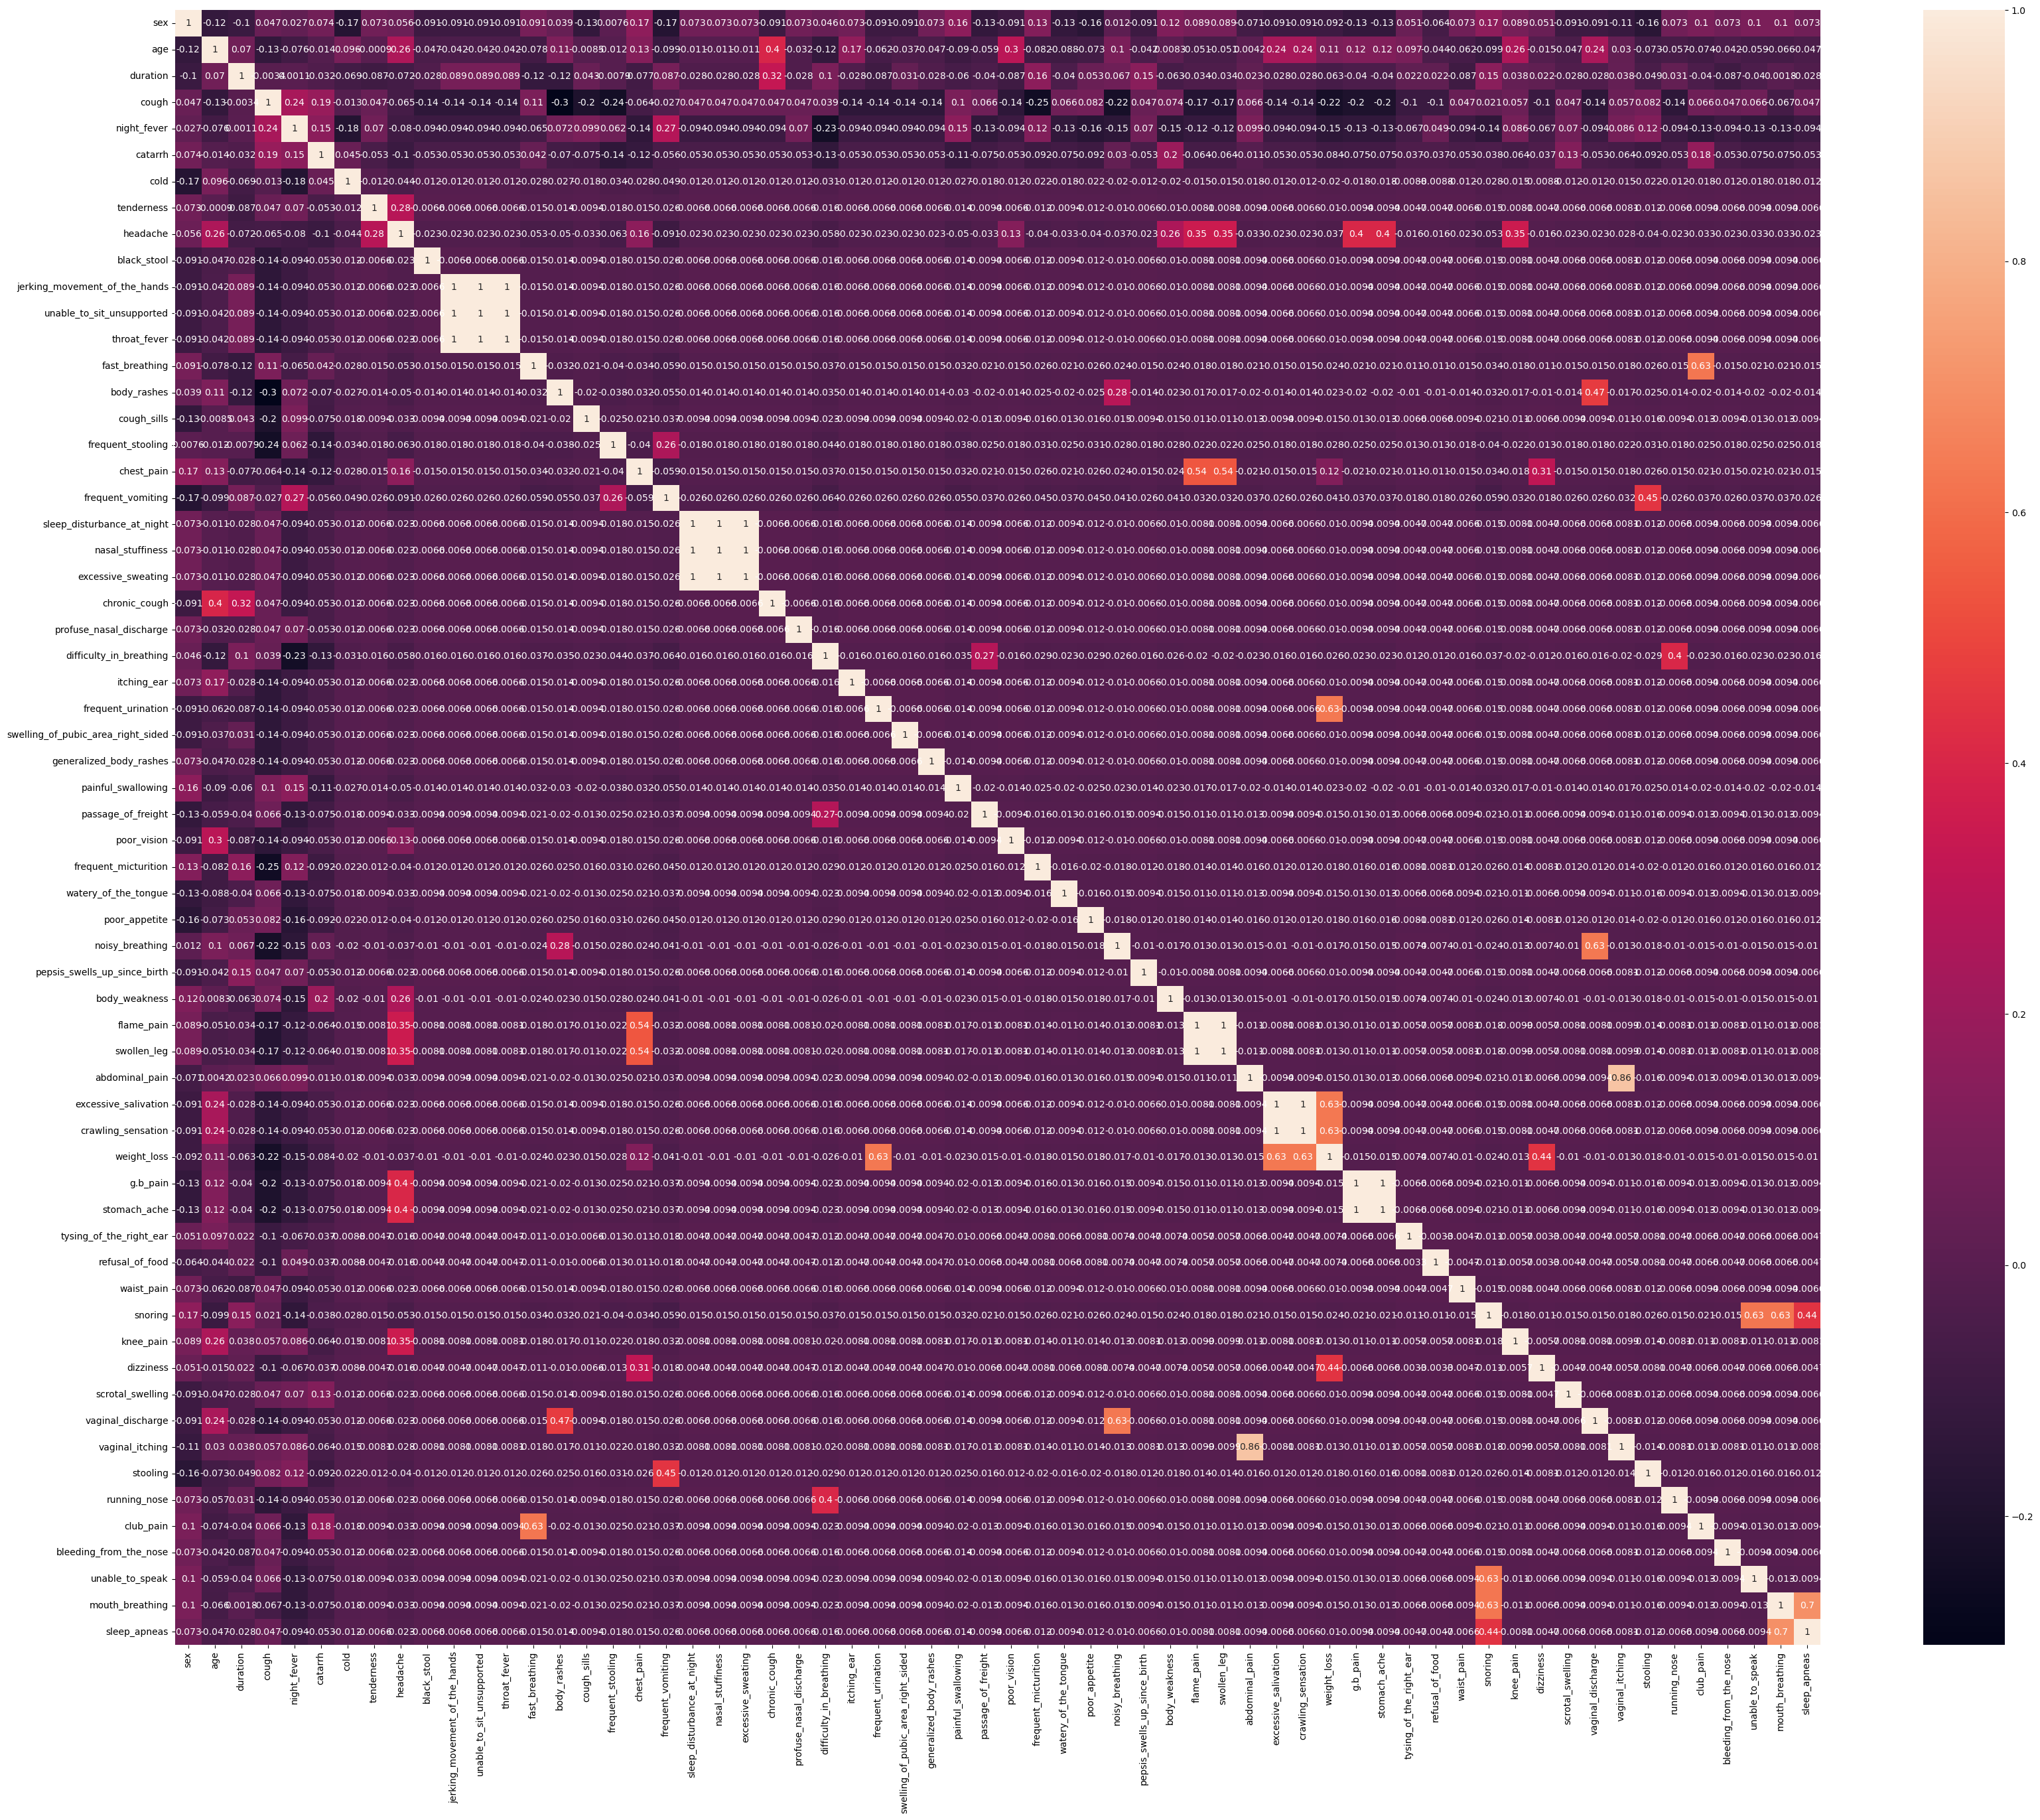

In [32]:
#correlation heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df_corr.corr(), annot=True)

In [33]:
df_corr.corr()

,sex,age,duration,cough,night_fever,catarrh,cold,tenderness,headache,black_stool,...,scrotal_swelling,vaginal_discharge,vaginal_itching,stooling,running_nose,club_pain,bleeding_from_the_nose,unable_to_speak,mouth_breathing,sleep_apneas
sex,1.000000,-0.122693,-0.099610,0.047449,0.027114,0.074210,-0.170850,0.072882,0.056349,-0.090566,...,-0.090566,-0.090566,-0.111104,-0.157912,0.072882,0.103412,0.072882,0.103412,0.103412,0.072882
age,-0.122693,1.000000,0.069569,-0.125570,-0.075840,-0.013978,0.096009,-0.000904,0.255165,-0.046866,...,-0.046866,0.244223,0.030215,-0.072810,-0.057079,-0.073744,-0.041759,-0.059252,-0.066498,-0.046866
duration,-0.099610,0.069569,1.000000,-0.003394,0.001100,-0.031594,-0.068836,-0.086811,-0.071868,-0.028103,...,-0.028103,-0.028103,0.037545,-0.049000,0.030605,-0.039875,-0.086811,-0.039875,0.001775,-0.028103
cough,0.047449,-0.125570,-0.003394,1.000000,0.239217,0.189906,-0.012945,0.046804,-0.065132,-0.141028,...,0.046804,-0.141028,0.057418,0.081607,-0.141028,0.066410,0.046804,0.066410,-0.066847,0.046804
night_fever,0.027114,-0.075840,0.001100,0.239217,1.000000,0.150611,-0.177823,0.070024,-0.080265,-0.094263,...,0.070024,-0.094263,0.085903,0.122094,-0.094263,-0.133750,-0.094263,-0.133750,-0.133750,-0.094263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
club_pain,0.103412,-0.073744,-0.039875,0.066410,-0.133750,0.178174,-0.017668,-0.009366,-0.032922,-0.009366,...,-0.009366,-0.009366,-0.011490,-0.016330,-0.009366,1.000000,-0.009366,-0.013289,-0.013289,-0.009366
bleeding_from_the_nose,0.072882,-0.041759,-0.086811,0.046804,-0.094263,-0.052565,-0.012452,-0.006601,-0.023202,-0.006601,...,-0.006601,-0.006601,-0.008097,-0.011509,-0.006601,-0.009366,1.000000,-0.009366,-0.009366,-0.006601
unable_to_speak,0.103412,-0.059252,-0.039875,0.066410,-0.133750,-0.074585,-0.017668,-0.009366,-0.032922,-0.009366,...,-0.009366,-0.009366,-0.011490,-0.016330,-0.009366,-0.013289,-0.009366,1.000000,-0.013289,-0.009366
mouth_breathing,0.103412,-0.066498,0.001775,-0.066847,-0.133750,-0.074585,-0.017668,-0.009366,-0.032922,-0.009366,...,-0.009366,-0.009366,-0.011490,-0.016330,-0.009366,-0.013289,-0.009366,-0.013289,1.000000,0.704769


In [34]:
#function to encode categorical variables
def le_encoder(data):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

In [36]:
le_encoder(df)

In [37]:
df.head(2)

,sex,age,duration,cough,night_fever,catarrh,cold,tenderness,headache,black_stool,...,vaginal_discharge,vaginal_itching,stooling,running_nose,club_pain,bleeding_from_the_nose,unable_to_speak,mouth_breathing,sleep_apneas,symptoms
0,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,25
1,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,49


In [38]:
# Separate features and target
target_column = 'symptoms'
X = df.drop(columns=[target_column])
y = df[target_column]

In [39]:
# Normalize the numerical features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [55]:
# Apply Fuzzy C-Means Clustering
n_clusters = 2  # Define the number of clusters
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(X_normalized.values)

In [56]:
# Generate membership probabilities for each cluster
membership_probs = pd.DataFrame(fcm.u, columns=[f'Cluster_{i+1}' for i in range(n_clusters)])

In [57]:
# Add the cluster assignments to the dataset
df['Cluster'] = fcm.predict(X_normalized.values)

In [58]:
df.head(2)

,sex,age,duration,cough,night_fever,catarrh,cold,tenderness,headache,black_stool,...,vaginal_itching,stooling,running_nose,club_pain,bleeding_from_the_nose,unable_to_speak,mouth_breathing,sleep_apneas,symptoms,Cluster
0,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,25,0
1,1,13,7,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,49,0


In [59]:
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [60]:
# Evaluate Clustering
silhouette_avg = silhouette_score(X_normalized, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_normalized, df['Cluster'])
davies_bouldin = davies_bouldin_score(X_normalized, df['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Silhouette Score: 0.17
Calinski-Harabasz Index: 48.08
Davies-Bouldin Index: 2.42


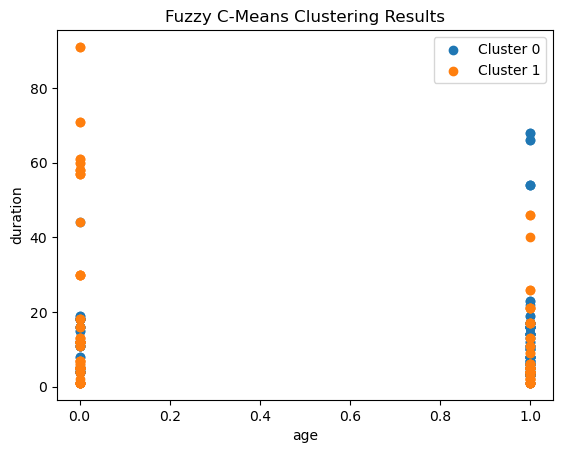

In [75]:
## plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    plt.scatter(df[df['Cluster'] == i][features[0]], 
                df[df['Cluster'] == i][features[1]], 
                label=f'Cluster {i}')
plt.xlabel(features[1])
plt.ylabel(features[2])
plt.title('Fuzzy C-Means Clustering Results')
plt.legend()
plt.show()

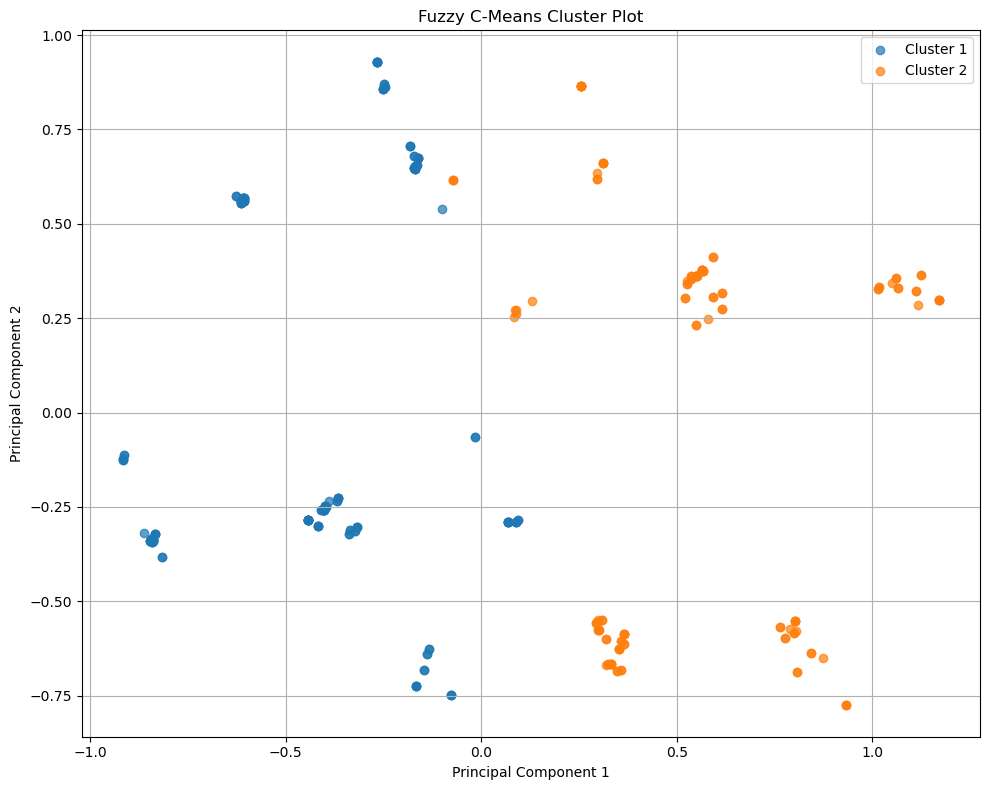

In [61]:
# Cluster Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_points = X_pca[df['Cluster'] == cluster]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {cluster + 1}',
        alpha=0.7,
    )

plt.title('Fuzzy C-Means Cluster Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# Train-test split
X_augmented = pd.concat([X_normalized, pd.DataFrame(fcm.u, columns=[f'Cluster_{i+1}' for i in range(n_clusters)])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

In [63]:
# Train a supervised model (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [66]:
# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
#print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
#print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
#print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy: 0.43


In [68]:
# Feature Importance
importances = rf_model.feature_importances_
features = X_augmented.columns
sorted_indices = np.argsort(importances)[::-1]

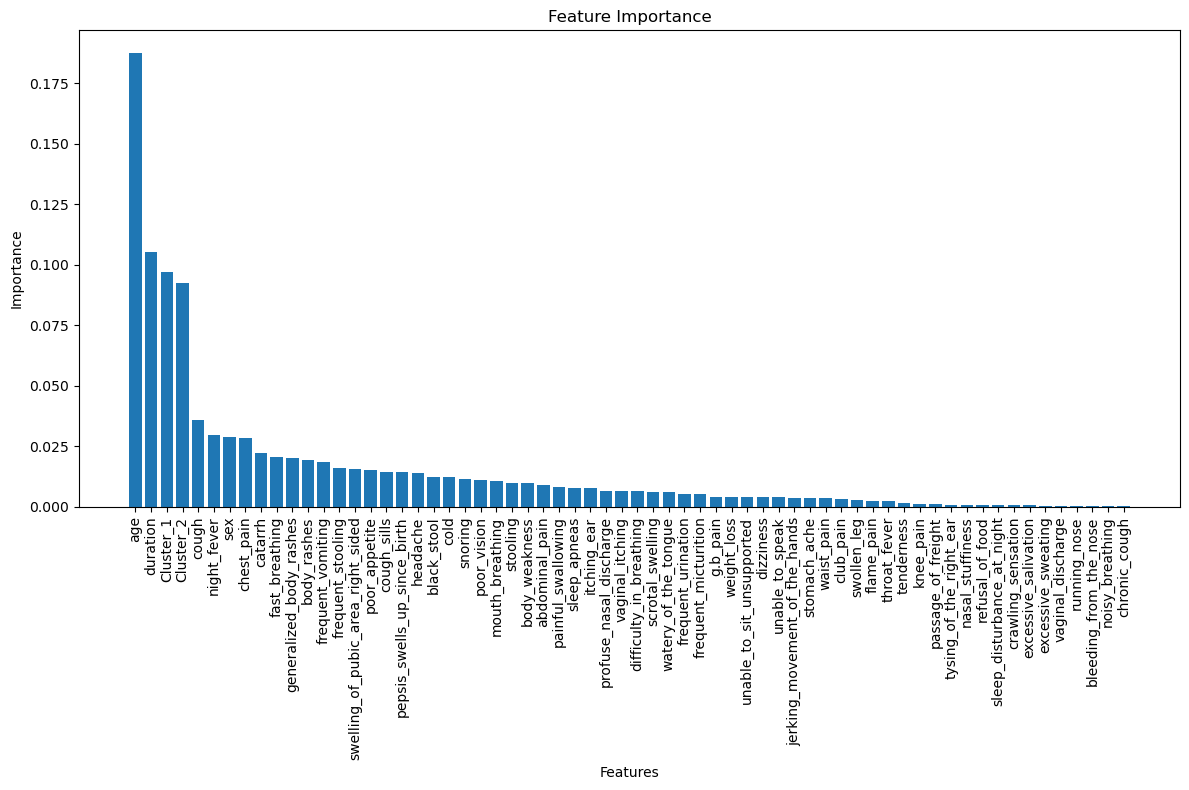

In [69]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), features[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [76]:
import joblib

In [77]:
# Save the scaler, FCM model, and Random Forest model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(fcm, 'fcm_model.pkl')
joblib.dump(rf_model, 'respiratory_disease_predictor.pkl')

print("Models saved successfully!")

Models saved successfully!


## Testting the Model

In [88]:
import pandas as pd
import numpy as np
import joblib

# Load the saved models
scaler = joblib.load('scaler.pkl')  # Normalizer for input data
fcm = joblib.load('fcm_model.pkl')  # Fuzzy C-Means model for clustering
rf_model = joblib.load('respiratory_disease_predictor.pkl')  # Random Forest model for prediction

# Define the feature columns used in your model
feature_columns = [
    'sex', 'age', 'duration', 'cough', 'night_fever', 'catarrh', 'cold',
    'tenderness', 'headache', 'black_stool', 'jerking_movement_of_the_hands',
    'unable_to_sit_unsupported', 'throat_fever', 'fast_breathing', 'body_rashes',
    'cough_sills', 'frequent_stooling', 'chest_pain', 'frequent_vomiting',
    'sleep_disturbance_at_night', 'nasal_stuffiness', 'excessive_sweating',
    'chronic_cough', 'profuse_nasal_discharge', 'difficulty_in_breathing',
    'itching_ear', 'frequent_urination', 'swelling_of_pubic_area_right_sided',
    'generalized_body_rashes', 'painful_swallowing', 'passage_of_freight',
    'poor_vision', 'frequent_micturition', 'watery_of_the_tongue',
    'poor_appetite', 'noisy_breathing', 'pepsis_swells_up_since_birth',
    'body_weakness', 'flame_pain', 'swollen_leg', 'abdominal_pain',
    'excessive_salivation', 'crawling_sensation', 'weight_loss', 'g.b_pain',
    'stomach_ache', 'tysing_of_the_right_ear', 'refusal_of_food', 'waist_pain',
    'snoring', 'knee_pain', 'dizziness', 'scrotal_swelling',
    'vaginal_discharge', 'vaginal_itching', 'stooling', 'running_nose',
    'club_pain', 'bleeding_from_the_nose', 'unable_to_speak', 'mouth_breathing',
    'sleep_apneas'
]

# Example symptoms data (replace with actual input)
example_symptoms = {
    'sex': 1,  # Male = 1, Female = 0
    'age': 35,
    'duration': 7,
    'cough': 1,
    'night_fever': 0,
    'catarrh': 1,
    'cold': 0,
    'tenderness': 1,
    'headache': 1,
    'black_stool': 0,
    'jerking_movement_of_the_hands': 0,
    'unable_to_sit_unsupported': 0,
    'throat_fever': 1,
    'fast_breathing': 1,
    'body_rashes': 0,
    'cough_sills': 1,
    'frequent_stooling': 0,
    'chest_pain': 1,
    'frequent_vomiting': 0,
    'sleep_disturbance_at_night': 1,
    'nasal_stuffiness': 1,
    'excessive_sweating': 0,
    'chronic_cough': 1,
    'profuse_nasal_discharge': 1,
    'difficulty_in_breathing': 1,
    'itching_ear': 0,
    'frequent_urination': 0,
    'swelling_of_pubic_area_right_sided': 0,
    'generalized_body_rashes': 0,
    'painful_swallowing': 1,
    'passage_of_freight': 0,
    'poor_vision': 0,
    'frequent_micturition': 0,
    'watery_of_the_tongue': 0,
    'poor_appetite': 1,
    'noisy_breathing': 1,
    'pepsis_swells_up_since_birth': 0,
    'body_weakness': 1,
    'flame_pain': 0,
    'swollen_leg': 0,
    'abdominal_pain': 1,
    'excessive_salivation': 0,
    'crawling_sensation': 0,
    'weight_loss': 1,
    'g.b_pain': 0,
    'stomach_ache': 1,
    'tysing_of_the_right_ear': 0,
    'refusal_of_food': 1,
    'waist_pain': 1,
    'snoring': 0,
    'knee_pain': 0,
    'dizziness': 1,
    'scrotal_swelling': 0,
    'vaginal_discharge': 0,
    'vaginal_itching': 0,
    'stooling': 0,
    'running_nose': 1,
    'club_pain': 0,
    'bleeding_from_the_nose': 0,
    'unable_to_speak': 0,
    'mouth_breathing': 1,
    'sleep_apneas': 1
}

# Convert the example symptoms to a DataFrame
example_df = pd.DataFrame([example_symptoms])

# Ensure the features are in the same order as the training dataset
example_df = example_df[feature_columns]

# Normalize the input symptoms using the scaler
example_normalized = scaler.transform(example_df)

# Get the membership probabilities for the input using FCM
membership_probs = fcm.predict(example_normalized)

# Convert membership_probs to a DataFrame for better readability
membership_df = pd.DataFrame(membership_probs, columns=[f'Cluster_{i+1}' for i in range(fcm.n_clusters)])

# Concatenate the normalized input data with the membership probabilities
example_normalized_df = pd.DataFrame(example_normalized, columns=feature_columns)

# Reset index to avoid any alignment issues before concatenating
example_normalized_df.reset_index(drop=True, inplace=True)
membership_df.reset_index(drop=True, inplace=True)

# Concatenate the normalized features and membership probabilities
example_augmented = pd.concat([example_normalized_df, membership_df], axis=1)

# Predict the target symptom using the trained Random Forest model
predicted_symptom = rf_model.predict(example_augmented)

# Output the results
predicted_cluster = np.argmax(membership_probs) + 1  # Adding 1 to match cluster numbering
print(f"The symptoms belong to Cluster {predicted_cluster}")
print(f"Membership Probabilities: {membership_probs}")
print(f"Predicted Symptom: {predicted_symptom[0]}")


ValueError: Shape of passed values is (1, 1), indices imply (1, 2)